# GRIP: The Spark Foundations- Data Science & Buisness Analytics Intenship
 Task -1: Prediction using supervised Machine Learning
 *In this task we required to predict percentage of the studend on the basis of number of houes stuidies using Linear Regresssion supervised machine learning algorithm.
 
# Auther: Komal Kurhe
    

# Step1: Importing the dataset

In [66]:
# Import required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Reading data from url

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [70]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [72]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [73]:
# To check rows & columns in data

df.shape

(25, 2)

In [74]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [76]:
# To check missing values

df.isnull().sum()


Hours     0
Scores    0
dtype: int64

# Step2:Visualizing the data

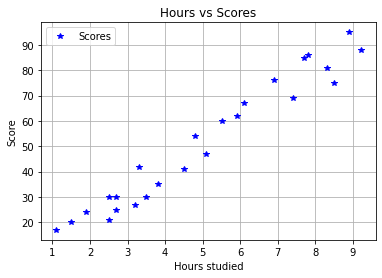

In [77]:
df.plot(x="Hours",y="Scores",style="*",color="blue")
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.grid()

# From the above graph we observe that there is a liner relationship between hours studied & scores.So we use linear regression.

In [78]:
# To Check correlation between variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step3: Data Preparation

In [79]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [80]:
# use iloc function to divide the data
x=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [81]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [82]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Step4:Training the Algorithm

In [85]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Step5:Visualizing the model

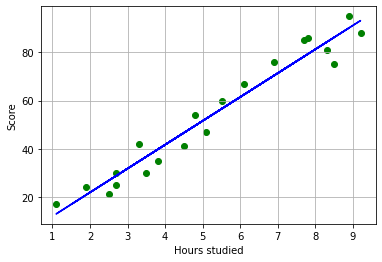

In [86]:
line=model.coef_*x + model.intercept_

#plotting for the training data
plt.scatter(x_train,y_train,color="green")
plt.plot(x,line,color="blue")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.grid()

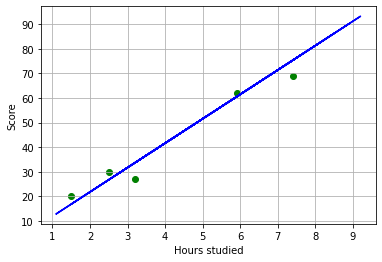

In [87]:
#plotting for the testing data
plt.scatter(x_test,y_test,color="green")
plt.plot(x,line,color="blue")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.grid()

# Step6: Making Predictions

In [59]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [88]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [89]:
y_pred=model.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [90]:
# Compare Actual vs predicted
comp=pd.DataFrame({'Actual':[y_test],'predicted':[y_pred]})
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [91]:
# Testing the model

hours=9.14
own_pred=model.predict([[hours]])
print('The predicted score if a person studies for', hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.14 hours is [92.60156027]


# Step7: Evaluating the model

In [92]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


# Thank you!